# Lab 3. Image shot noise


Probability and Statistics, Spring 2017   

[CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/3.0/), Sakari Lukkarinen   
Helsinki Metropolia University of Applied Sciences   


## Introduction

The Poisson distribution named after a French mathematician is a discrete probability distribution that expresses the probability of a given number of events occur in a known average rate and independently of the time since last event ([Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/650px-Poisson_pmf.svg.png" alt="Poisson distributions for different expected values ($\lambda$)" style="Height:200px">
*<center>Figure 0: Poisson distributions for different expected values ($\lambda$)</center>*

For example, if you keep recording the number of FaceBook messages received each day, you may notice, that you receive an average number of 14 messages per day, for example. In addition, if we assume that receiving any particular message doesn't affect the arrival times of future messages, i.e., if messages arrive independently of one another, then we can assume that the number of messages received per day obeys a Poisson distribution. 

<img src="http://www.opera.com/blogs/mobile/wp-content/uploads/sites/4/2015/06/facebook_blog_image_2.png" alt="Facebook notifications" style="Height:200px">
*<center>Figure 1: Facebook notifications.</center>*

Other examples that may follow a Poisson distribution are 

* the number of phone calls received per week, 
* the number of alarm messages per hour a patient monitor gives in hospital, or 
* the number of students in queue in a school's cafeteria in a given quarter of an hour of a day.

### Learning outcomes

The aim of this laboratory exercise is to learn to understand how the random intensity noise in photographs follows the Poisson distribution. 

* We start by learning what is [the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) and how to generate random numbers that follows the Poisson distribution.
* Then we learn to simulate noise in images. 
* Lastly we study test images having different levels of [shot noise](https://en.wikipedia.org/wiki/Shot_noise) depending on the darkness of the image, and 
* verify that the [signal-to-noise ratio (SNR-ratio)](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) in the images depends on the amount of light scattered to the image detector.

## Probability of events for a Poisson distribution

An event can occur 0, 1, 2, ... times in an interval. Let $\lambda$ be the expected value $X$, the number of occurences during the time period. If we measure $X$ for many time periods, the average value of $X$ will be $\lambda$. The probability of observing k events in an interval is given by the equation

$\large{P(X = k) = \frac{e^{-\lambda}\lambda^k}{k!}\quad k = 0, 1, 2, ...}$

where
- $\lambda$ is the average number of events in a given time interval
- $P(X = k)$  is the probability of observing $k$ events
- $e$ is the Euler's number (2.71828...)
- $k!$ is the factorial $k\cdot (k-1) \cdot (k-2) \cdot ... 1$.

### Example

What is the probability of receiving $k$ Facebook messages per day, if the mean value per day is $\lambda = 14$?

In [1]:
# Import necessary libraries and functions
%pylab inline
import numpy.random as rnd
from scipy.misc import factorial

Populating the interactive namespace from numpy and matplotlib


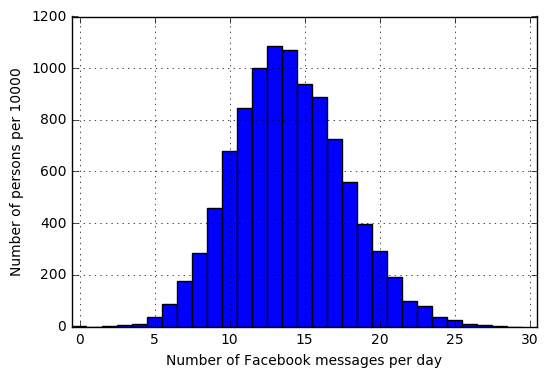

In [2]:
# Generate random numbers from Poisson distribution
# Average number of messages per day
lm = 14
# Number of persons
N = 10000
# Generate random data
x = rnd.poisson(lm, N)

# Show the frequency histogram
bins = np.arange(-0.5, 30.5)
p = plt.hist(x, bins)
plt.xlabel('Number of Facebook messages per day')
plt.ylabel('Number of persons per 10000')
xl = plt.xlim(-0.5, 30.5)
plt.grid()

*Figure 2: Distribution of randomly generated facebook notifications ($\lambda = 14$)*

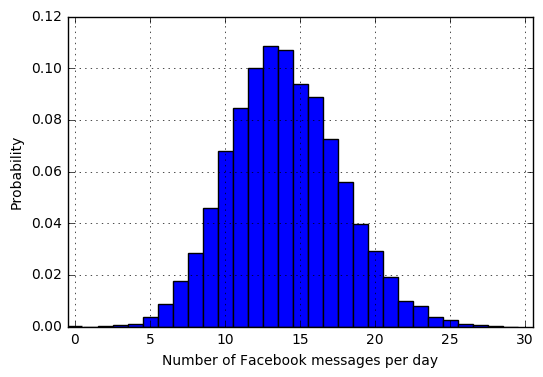

In [3]:
# Propabilities (=normed histogram)
p = plt.hist(x, bins, normed=True)
plt.xlabel('Number of Facebook messages per day')
plt.ylabel('Probability')
xl = plt.xlim(-0.5, 30.5)
plt.grid()

*Figure 3: Probability distribution of Facebook notifications ($\lambda = 14$).*

### Exercise 1

1. How does the probability histogram change, if the average number of messages per day is: $\lambda = [1, 3, 5, 7, 10, 20, 30]$?
2. Check by calculating the average number of messages, `np.mean(x)`, is same as $\lambda$.
3. How would you calculate the standard deviation for each of these cases?
4. What is the probability to receive from 10 to 20 messages per day in the original example ($\lambda = 14$)?
5. Can you calculate the probabilities of the original example for `k = range(30)` using the theoretical equation? What problems do you encount, if any?


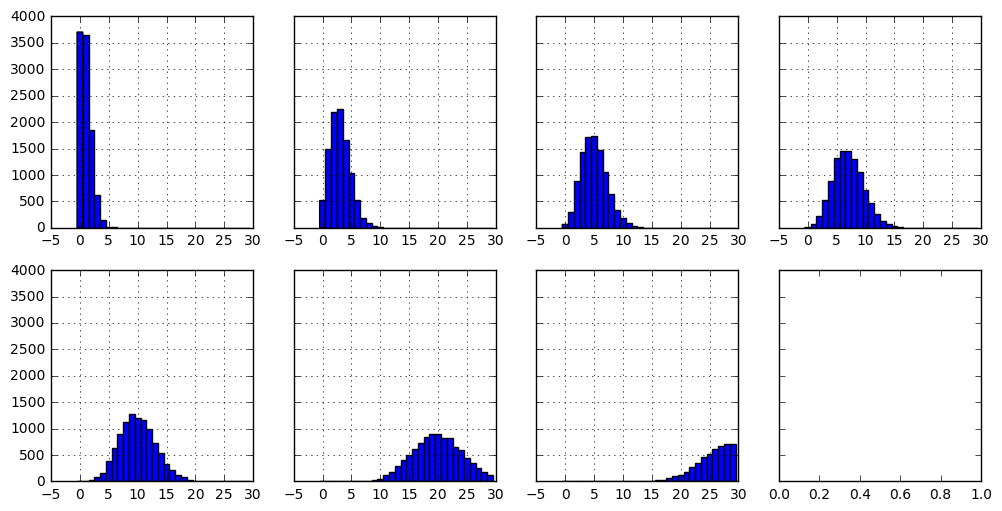

In [4]:
N = 10000
x1 = rnd.poisson(1, N)
x3 = rnd.poisson(3, N)
x5 = rnd.poisson(5, N)
x7 = rnd.poisson(7, N)
x10 = rnd.poisson(10, N)
x20 = rnd.poisson(20, N)
x30 = rnd.poisson(30, N)

bins = np.arange(-0.5, 30.5)

fig,axes = plt.subplots(2,4,figsize=(12,6),sharey=True)
axes[0][0].hist(x1, bins)
axes[0][1].hist(x3, bins)
axes[0][2].hist(x5, bins)
axes[0][3].hist(x7, bins)

axes[1][0].hist(x10, bins)
axes[1][1].hist(x20, bins)
axes[1][2].hist(x30, bins)

axes[0][0].grid()
axes[0][1].grid()
axes[0][2].grid()
axes[0][3].grid()

axes[1][0].grid()
axes[1][1].grid()
axes[1][2].grid()

##### 1. The density of the histogram moves to the right when lamda increases.

In [5]:
np.mean(x1), np.mean(x3), np.mean(x5), np.mean(x7), np.mean(x10), np.mean(x20), np.mean(x30)

(0.99709999999999999,
 3.0055999999999998,
 5.0011999999999999,
 7.0171000000000001,
 10.0099,
 20.024899999999999,
 29.914999999999999)

In [6]:
np.std(x1), np.std(x3), np.std(x5), np.std(x7), np.std(x10), np.std(x20), np.std(x30)

(0.99974576268169302,
 1.7417142819647544,
 2.2472646840103194,
 2.6525473775222186,
 3.1411147686768786,
 4.4730839462277023,
 5.4895878715983768)

In [7]:
sum=0
for i in range(10, 21):
    sum+=p[0][i]
sum

0.84886977395479091

In [8]:
sum=0
for k in range(30):
    sum+=p[0][k]
sum

1.0

##### 5. The probability of k in range(30) is almost 1

## Image Shot Noise

The dominant noise in the darker parts of an image from an image sensor is typically caused by statistical quantum fluctuations, that is, variation in the number of photons sensed at a given exposure level. This noise is known as photon [shot noise](https://en.wikipedia.org/wiki/Shot_noise). The photograph below illustrates that phenomena. It has been taken in weak lighting conditions. As you can notice, the image is quality is coarse containing noisy fluctuations in color.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/87/Highimgnoise.jpg" alt="Shot noise in image" style="height:250px">
*<center>Figure 4: Digital photograph containing image shot noise.</center>*

We can simulate the shot noise by using random numbers. To simplify the situation, we model a simple flatbed [image scanner](https://en.wikipedia.org/wiki/Image_scanner). 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Scanner.view.750pix.jpg" alt="Desktop image scanner" style="height:250px">
*<center>Figure 5: Desktop image scanner.</center>*

Typically flatbed image scanners have either a [charge-coupled device (CCD)](https://en.wikipedia.org/wiki/Charge-coupled_device) or [contact image sensor (CIS)](https://en.wikipedia.org/wiki/Contact_image_sensor). Both of them scan the whole image line by line.

<img src="http://www.canon.com/technology/canon_tech/explanation/images/scan_ph007.jpg" alt="Desktop image scanner" style="height:200px">
*<center>Figure 6: Technology used in scanners [[Canon technology](http://www.canon.com/technology/canon_tech/explanation/scan.html).]</center>*

We can simulate the behaviour of a line detector by generating random photons that are detected in one of the detectors on the line.

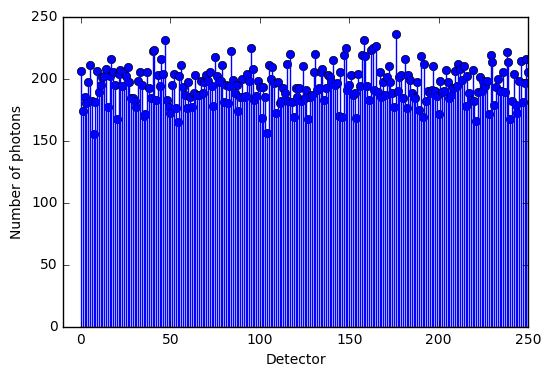

In [9]:
# Create a line of detectors
N = 512 # Number of detectors on the line
x = np.zeros(N)

# Flux of 100 000 photons hit randomly on the detectors

# Number of photons
Np = 100e3

# Loop while all photons detected
n = 0
while n < Np:
    # Select randomly on which of the detectors the photon hits
    i = rnd.randint(N)
    # Increase the number of photons detected by 1
    x[i] += 1
    # Increase the loop variable
    n += 1
    
# plot how many photons hit on each detector
plt.figure()
plt.stem(x)
plt.xlabel('Detector')
plt.ylabel('Number of photons')
xl = plt.xlim(-10, 250)

*Figure 7: Simulation of image shot noise on line detector.*

### Exercise 2

1. Create a histogram of the detected photons per pixel.
2. What is the mean value of detected photons per pixel?
3. What is the standard deviation of detected photons per pixel?

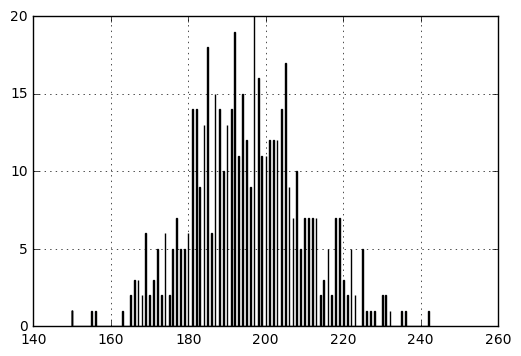

In [10]:
p = plt.hist(x, N)
plt.grid()

In [11]:
np.mean(x), np.std(x)

(195.3125, 14.525032271909071)

## Signal-to-Noise Ratio

Signal-to-noise ratio in images can be defined how much variation there is around the mean value of the intensity over a larger area:

`SNR = np.mean(x)/np.std(x)`

In this example we can calculate the `SNR` over the whole line.

### Exercise 3

1. Calculate the Signal-to-Noise ratio for the previous example.
2. If you change the light intensity (=number of photons), how do the mean value, standard deviation and SNR value change?
3. Make a loop where you increase the light intensity by several decades (from thousands to millions) and store the mean values, standard deviations and SNRs. Make a graph how the SNR changes when the light intensity is increased. What do you observe?

In [12]:
SNR = np.mean(x)/np.std(x)
SNR

13.446613841796957

In [13]:
N = 512
x = np.zeros(N)
Np = 100e3
n = 0
while n < Np:
    i = rnd.randint(N)
    x[i] += 1
    n += 1
SNR = np.mean(x)/np.std(x)      
np.mean(x), np.std(x), SNR

(195.3125, 14.049716411728744, 13.901526143043895)

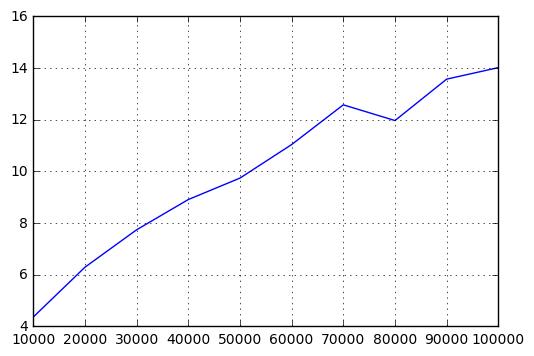

In [14]:
N = 512
Np = linspace(100e2, 100e3, 10)
SNR = np.zeros(10)
for npi in range(10):
    x = np.zeros(N)
    n = 0
    while n < Np[npi]:
        i = rnd.randint(N)
        x[i] += 1
        n += 1
    SNR[npi] = np.mean(x)/np.std(x)      
plot(Np, SNR)
grid()

## Image Pattern Simulation

Think a case where we have only two intensity values in the image: one darker and another lighter. Below is an example of two-colored image.

<img src="http://cdn.wallpapersafari.com/88/27/MPO9xT.jpg" alt="two-color image" style="height:250px">
*<center>Figure 8: Peach colored background image. [[Martin Driver, Wallpapersafari](http://wallpapersafari.com/w/MPO9xT/)]</center>*

How we could simulate this with our line detector simulator? 

We can create an image mask having two intensities: one for the darker and one for the lighter area. Here is an example:

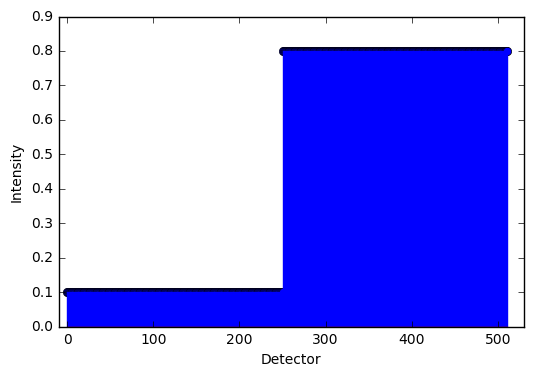

In [15]:
# Create an image mask
I1 = 0.1 # Image intensity for the darker area
I2 = 0.8 # Image intensity for the lighter area

# Create an index to all elements in mask
index = np.arange(N)

# Initialize all element to I1
mask = I1*np.ones(N)

# Change the intensity to all elements having index > 250
mask[index > 250] = I2

# Show the image mask
plt.stem(mask)
plt.xlabel('Detector')
plt.ylabel('Intensity')
xl = plt.xlim(-10, 530)

*Figure 9: Perfect two-colored line image.*

Now we can use this mask to simulate the image patterns. First we simulate the flux of photons hitting randomly everywhere in the line detector. Then we use the mask to decrease the light intensity on different parts of the detector. Lastly we draw a graph of how many photons each detector collected.

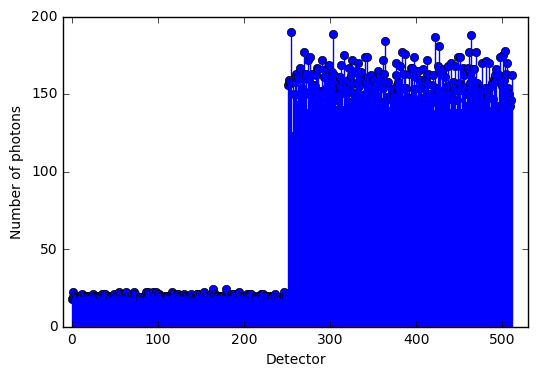

In [16]:
# See how the mask affects on the detected photons.
# Flux of 100 000 photons hit randomly on the detectors
# The mask filters out some of the photons

x = np.zeros(N)
Np = 100*1000
n = 0
while n < Np:
    i = rnd.randint(N)
    x[i] += 1
    n += 1
    
# Multiply the results with the mask
x = np.round(x*mask)
    
# plot how many photons each detector detected
plt.figure()
plt.stem(x)
plt.xlabel('Detector')
plt.ylabel('Number of photons')
xl = plt.xlim(-10, 530)

*Figure 10: Simulation of image shot noise on two-colored line image.*

### Exercise 4

1. How does the histogram of the number of photons detected look like? Remember add enough bins in order to see the details of the histogram (for example `plt.hist(x, bins=50)`).
2. How does the histogram change, if you 
    * change the intensity values (I1 and I2) in the image pattern?
    * change the number of photons (Np)?
    * the position, where the area changes from darker to lighter (find in the code `mask[index > 250] = I2`?

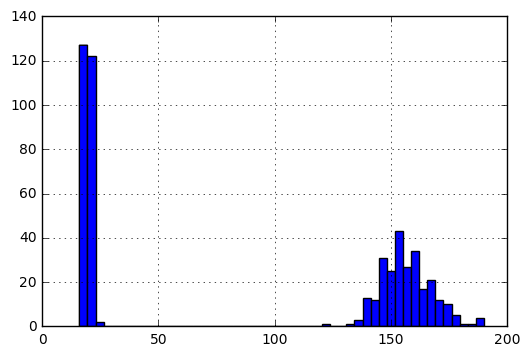

In [17]:
plt.hist(x, bins=50)
grid()

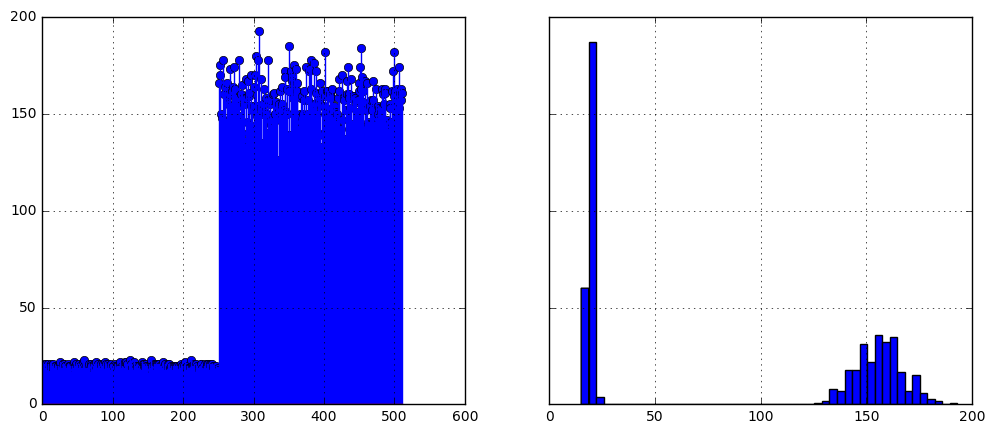

In [18]:
# Create an image mask
I1 = 0.1 # Image intensity for the darker area
I2 = 0.8 # Image intensity for the lighter area

index = np.arange(N)
mask = I1*np.ones(N)
mask[index > 250] = I2

x = np.zeros(N)
Np = 100e3
n = 0
while n < Np:
    i = rnd.randint(N)
    x[i] += 1
    n += 1
    
x = np.round(x*mask)

fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)
axes[0].stem(x)
axes[1].hist(x, bins=50)

axes[0].grid()
axes[1].grid()

## Studying Real Images

Next let's study a real images. [About the Camera ISO Noise Tests](http://www.the-digital-picture.com/Help/ISO-Noise.aspx) page gives examples of digital camera's capability to detect test images. Below is an example code where we use [`scikit-image`](http://scikit-image.org/) to read in a test photograph from the Internet and show it in the Notebook.

The original photograph was taken with a digital camera at ISO speed 3200. 

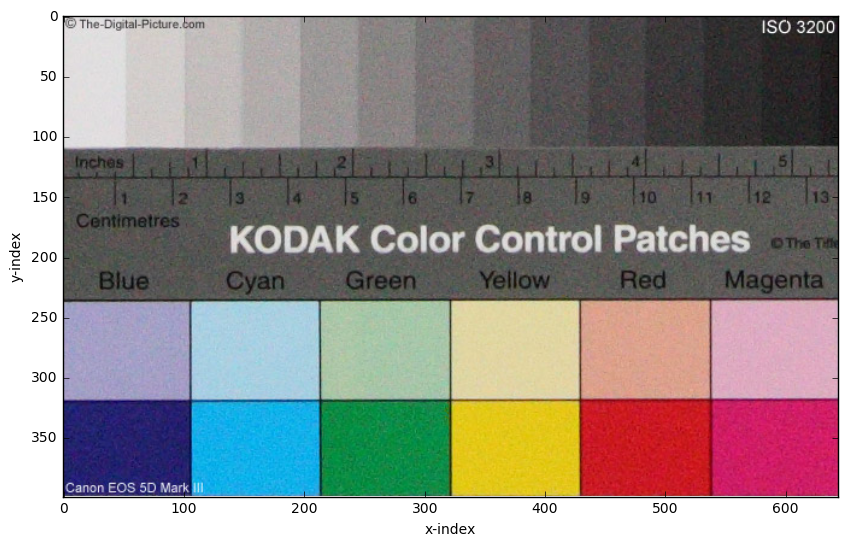

In [19]:
# We need image processing library, more details see: http://scikit-image.org/
import skimage.io as skio

# The url address to find the image
fpath = 'http://media.the-digital-picture.com/Images/Other/Canon-EOS-5D-Mark-III-DSLR-Camera/Color-Blocks/'

# Filename for ISO 3200 image
fname = '5DIII-3200.jpg'
# Another ISO speed example for exploring the code
# fname = '5DIII-200.jpg' 

# Read the image
image = skio.imread(fpath + fname)

# Show it in large figure
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xlabel('x-index')
plt.ylabel('y-index');

*Figure 11: Raw image data with colors.*

Let's check what is the shape and dimensions of that test image. We use image's shape and ndim attributes.

In [20]:
# What are the shape and the dimensions of that image?
print('shape = %s dimensions = %s' % (image.shape, image.ndim))

shape = (399, 644, 3) dimensions = 3


In order to make histogram analysis, we conver the image from rgb-colors to gray-scale. For that we need `skimage.color.skcolor` submodule. For more details see [Image adjustment: transforming image content](http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html).

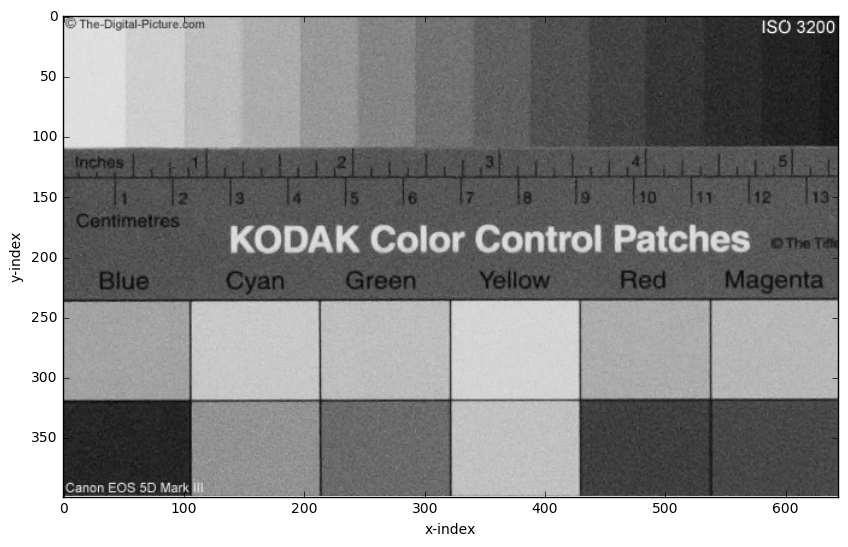

In [21]:
# Next we convert the original color image to gray-image

# Import needed submodule 
import skimage.color as skcolor

# Convert to gray-scale image
grayimage = skcolor.rgb2gray(image)

# Show the results
plt.figure(figsize=(10,10))
plt.imshow(grayimage, cmap='gray')
plt.xlabel('x-index')
plt.ylabel('y-index');

*Figure 12: gray color mapped 1-channel image.*

Let's check what are the shape and dimensions of the gray-scaled image.

In [22]:
# What are the shape and dimensions of the 1-channel gray-color image?
print('shape = %s dimensions = %s' % (grayimage.shape, grayimage.ndim))

shape = (399, 644) dimensions = 2


Next we show only the upper part of the image where there are the gray-scale test strips. The coordinates for that part are: y = 20..100 and x = 0..644. These values are given as indexes to the original image.

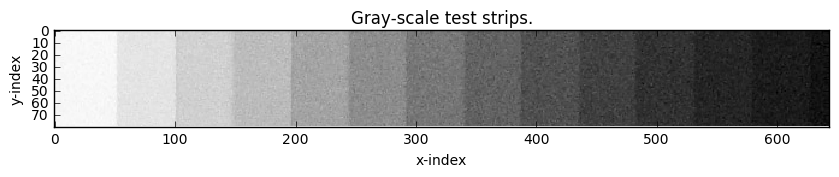

In [23]:
# Select the part from the image where the gray-scale test strips locate
image_part = grayimage[20:100, 0:644]

# Show the test strips part.
plt.figure(figsize=(10,10))
plt.imshow(image_part, cmap='gray', interpolation='none', aspect='equal')
plt.title('Gray-scale test strips.')
plt.xlabel('x-index')
plt.ylabel('y-index');

*Figure 13: Gray-scale test strips.*

Now we are ready to make histogram analysis for the test strips and see if there is any image shot noise (see the first part of this laboratory exercise).

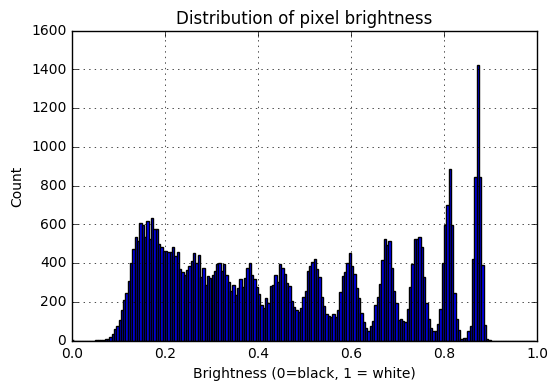

In [24]:
# Calculate the histogram of the gray-scale test strips

# First flatten the 2D matrix of pixels in a row
data = image_part.flatten()

# Make a histogram, use custom bins
plt.figure()
plt.hist(data, bins=np.arange(0, 1, 0.005))
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness');
plt.grid()

*Figure 14: Distribution of pixel brightness.*

From this histogram we can see that the brightest areas (on the right in the histogram, but left in the image) can be clearly distinguish from each other, but the intensities of the darker areas (on the left in the histogram, but right in the image) are overlapping each other.

The next step is to analyse each part of the image separately. For that purpose we select even smaller area from the original image and check what is its intensity histogram.

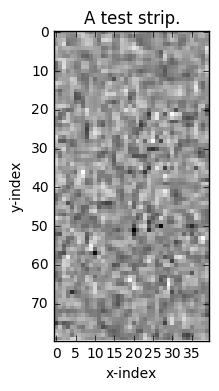

In [25]:
# Take a smaller part y = 20..100, x = pos...pos+40
pos = 580
image_part = grayimage[20:100, pos:pos+40]

# Show the image part
plt.figure()
plt.imshow(image_part, cmap='gray', interpolation='none', aspect='equal')
plt.title('A test strip.')
plt.xlabel('x-index')
plt.ylabel('y-index')

*Figure 15: One test strip area selected for further analysis.*

In [26]:
# Put all pixels in row of data and calculate the histogram
data = image_part.flatten()

# Print the shapes of the image part and flattened data
print('Shape of image part:', np.shape(image_part))
print('Shape of data: ', np.shape(data))

Shape of image part: (80, 40)
Shape of data:  (3200,)


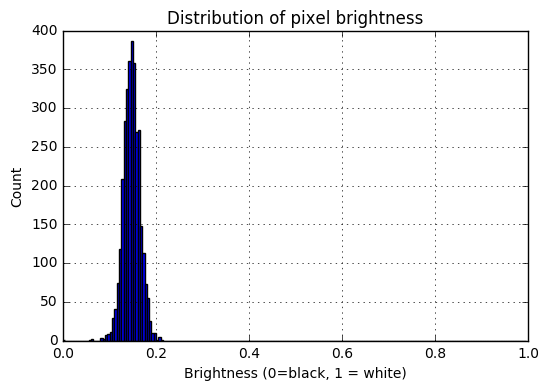

In [27]:
# Show the histogram of data
plt.figure()
plt.hist(data, bins=np.arange(0, 1, 0.005))
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness')
plt.grid()

*Figure 16: Distribution of pixel brightness on one test strip.*

### Exercise 6

Calculate the histogram, mean and SNR value for each of the strips on the gray-scale test. Make a graph of the SNR vs. mean -`plot(mean_values, SNR_values, 'o')`. What do you observe? What mathematical function would best describe the relationship between the mean values and SNR values?

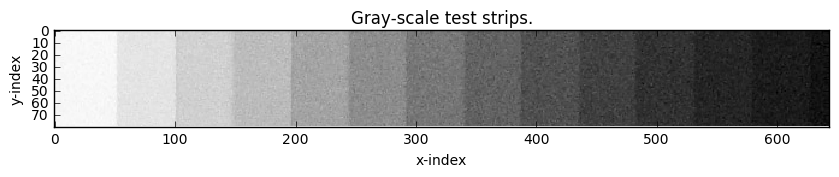

In [28]:
# Select the part from the image where the gray-scale test strips locate
image_part = grayimage[20:100, 0:644]

# Show the test strips part.
plt.figure(figsize=(10,10))
plt.imshow(image_part, cmap='gray', interpolation='none', aspect='equal')
plt.title('Gray-scale test strips.')
plt.xlabel('x-index')
plt.ylabel('y-index');

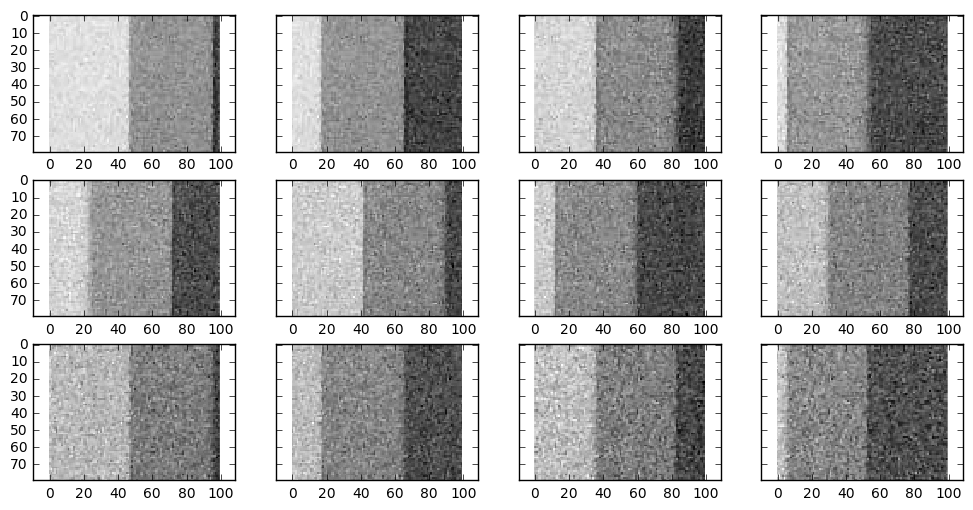

In [38]:
image_list = [None]*12
pos = 5
for i in range(12):
    image_list[i] = grayimage[20:100, pos+i*30:pos+i*30+100]

fig,axes = plt.subplots(3,4,figsize=(12,6),sharey=True)
axes[0][0].imshow(image_list[0], cmap='gray', interpolation='none', aspect='equal')
axes[0][1].imshow(image_list[1], cmap='gray', interpolation='none', aspect='equal')
axes[0][2].imshow(image_list[2], cmap='gray', interpolation='none', aspect='equal')
axes[0][3].imshow(image_list[3], cmap='gray', interpolation='none', aspect='equal')

axes[1][0].imshow(image_list[4], cmap='gray', interpolation='none', aspect='equal')
axes[1][1].imshow(image_list[5], cmap='gray', interpolation='none', aspect='equal')
axes[1][2].imshow(image_list[6], cmap='gray', interpolation='none', aspect='equal')
axes[1][3].imshow(image_list[7], cmap='gray', interpolation='none', aspect='equal')

axes[2][0].imshow(image_list[8], cmap='gray', interpolation='none', aspect='equal')
axes[2][1].imshow(image_list[9], cmap='gray', interpolation='none', aspect='equal')
axes[2][2].imshow(image_list[10], cmap='gray', interpolation='none', aspect='equal')
axes[2][3].imshow(image_list[11], cmap='gray', interpolation='none', aspect='equal')

### Exercise 7

Take photos of a smooth and unicolor surface on different lighting conditions and store them into your computer. Then study as in the previous exercise does the same SNR vs. mean intensity value rule work also here. 